# 1. <u>Importing Necessary Libraries </u>

In [60]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 2. <u>Data Preprocessing Phases</u>

In [38]:
df = pd.DataFrame()

directory = './AggregatedDataset/'
for filename in os.listdir(directory):
    if filename[0] == '.':
        continue
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        temp = pd.read_csv(f)
        df = pd.concat([df, temp])

print(df)

            x0        y0        z0        x1        y1        z1        x2  \
0    -0.175628  0.204000  2.892272 -0.179617  0.523022  2.860681 -0.181976   
1    -0.174483  0.203843  2.891971 -0.176972  0.523468  2.860984 -0.177624   
2    -0.173419  0.203856  2.891706 -0.175530  0.524267  2.861188 -0.176301   
3    -0.146659 -0.025146  2.835408 -0.146157  0.277126  2.796138 -0.144050   
4    -0.118631 -0.259484  2.783743 -0.114505  0.024387  2.733085 -0.110170   
...        ...       ...       ...       ...       ...       ...       ...   
1152 -0.031074 -0.213648  2.380406 -0.034692  0.044911  2.398920 -0.036498   
1153 -0.029033 -0.214632  2.382608 -0.031775  0.044897  2.401066 -0.033274   
1154 -0.028023 -0.214859  2.384013 -0.030562  0.044744  2.401859 -0.032316   
1155 -0.028775 -0.215633  2.383122 -0.032645  0.043769  2.401059 -0.037751   
1156 -0.031986 -0.214297  2.380302 -0.035529  0.043504  2.399566 -0.040458   

            y2        z2        x3  ...       z23       x24    

In [39]:
dataset_filename = 'final_dataset_volume_1.csv'
dataset = pd.read_csv(dataset_filename)
dataset

,x0_0,y0_0,z0_0,x1_0,y1_0,z1_0,x2_0,y2_0,z2_0,x3_0,...,x22_14,y22_14,z22_14,x23_14,y23_14,z23_14,x24_14,y24_14,z24_14,gestureLabel
0,-0.204509,-0.231852,2.754740,-0.183313,0.021745,2.722442,-0.160604,0.269536,2.678496,-0.150488,...,-0.294275,-0.228529,2.467200,0.051053,0.284080,2.547323,0.084085,0.233071,2.580800,0.0
1,-0.205910,-0.231284,2.753148,-0.183092,0.022023,2.721940,-0.157748,0.269648,2.678936,-0.148618,...,-0.322549,-0.229593,2.531100,-0.000089,0.298676,2.598341,0.024250,0.252613,2.579778,0.0
2,-0.206187,-0.230854,2.752944,-0.181606,0.022386,2.722124,-0.154308,0.269743,2.679503,-0.146234,...,-0.312972,-0.244179,2.513334,0.077471,0.253935,2.508044,0.110522,0.192595,2.562273,0.0
3,-0.206352,-0.229995,2.752958,-0.179751,0.022750,2.722315,-0.150479,0.269884,2.679807,-0.144726,...,-0.291575,-0.203919,2.489133,0.225467,-0.076853,2.423342,0.153054,-0.086606,2.446333,0.0
4,-0.206131,-0.228837,2.753482,-0.178426,0.023735,2.722597,-0.148413,0.270744,2.680139,-0.143232,...,-0.211119,-0.166091,2.883111,0.124102,-0.292121,3.011770,0.076095,-0.245350,3.013428,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32683,-0.219653,-0.105181,2.018542,-0.223143,0.185314,1.958439,-0.223866,0.465150,1.885464,-0.216167,...,-0.226217,-0.018966,2.595732,0.122220,-0.112569,2.738988,0.092191,-0.062385,2.698345,8.0
32684,-0.154176,-0.093990,2.064927,-0.139104,0.218614,2.044824,-0.122276,0.519363,2.010910,-0.112494,...,-0.216650,-0.070948,2.321689,0.162953,-0.145700,2.378738,0.126439,-0.092569,2.354894,8.0
32685,0.101330,-0.366173,2.099115,0.149896,-0.034787,2.102345,0.194262,0.284618,2.090462,0.205277,...,-0.084552,-0.367176,1.956440,0.439100,-0.409055,2.031457,0.437779,-0.307294,1.968705,8.0
32686,-0.262099,0.046881,2.249739,-0.261621,0.337878,2.193943,-0.257131,0.618980,2.128328,-0.264669,...,-0.445879,0.036046,2.029431,0.041998,0.010592,2.118642,0.055779,0.060975,2.059983,8.0


# 3. <u>Train Test Split</u>

In [40]:
features = dataset.iloc[:, :-1]
labels = dataset.iloc[:,-1]

categorical_labels = to_categorical(labels, num_classes = 9, dtype ="int32")
print(categorical_labels)
X_train, X_test, Y_train, Y_test = train_test_split(features, categorical_labels, test_size=0.2)
print(X_train)
print(Y_train)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
           x0_0      y0_0      z0_0      x1_0      y1_0      z1_0      x2_0  \
26926  0.147499 -0.193453  2.218697  0.169952  0.061658  2.241388  0.189679   
17436  0.018765  0.004589  2.006787  0.022774  0.247115  2.087340  0.026778   
8769  -0.064507 -0.197007  2.402838 -0.054132  0.058129  2.435648 -0.044697   
1741   0.155498 -0.022066  2.613422  0.156671  0.303828  2.589489  0.156789   
12016 -0.189344 -0.118308  3.216219 -0.201748  0.126133  3.206132 -0.215935   
...         ...       ...       ...       ...       ...       ...       ...   
13417  0.176256  0.026942  2.608196  0.164937  0.333418  2.583388  0.151335   
9216  -0.203041 -0.099717  2.014531 -0.206402  0.207369  1.989646 -0.208137   
29738 -0.204126  0.103221  2.320808 -0.212054  0.436377  2.304944 -0.218778   
26081  0.035817 -0.273392  1.931277  0.053011  0.009569  1.932170  0.069962   
17257  0.03

# 4. <u>Constructing the Neural Network </u>

In [41]:
model = tf.keras.Sequential()
model.add(Dense(1024, name='hidden-1', activation='relu', input_shape=(1125,)))
model.add(Dense(1024, name='hidden-2', activation='relu'))
model.add(Dense(512, name='hidden-3', activation='relu'))
model.add(Dense(9, name='output', activation='softmax'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 1024)              1153024   
                                                                 
 hidden-2 (Dense)            (None, 1024)              1049600   
                                                                 
 hidden-3 (Dense)            (None, 512)               524800    
                                                                 
 output (Dense)              (None, 9)                 4617      
                                                                 
Total params: 2,732,041
Trainable params: 2,732,041
Non-trainable params: 0
_________________________________________________________________


In [43]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=['categorical_crossentropy'], metrics=['accuracy'])

In [44]:
callbacks = [
    EarlyStopping(patience=2, verbose=1), 
    ReduceLROnPlateau(factor=0.5, patience=10, verbose=1, min_lr=0.00001, cooldown=2, min_delta=0.001)
]

In [53]:
model_history = model.fit(X_train, Y_train, epochs = 500, validation_split = 0.25, shuffle = True, callbacks = callbacks)

Epoch 1/500
613/613 [==============================] - 6s 9ms/step - loss: 0.1509 - accuracy: 0.9416 - val_loss: 0.2079 - val_accuracy: 0.9260 - lr: 1.0000e-04
Epoch 2/500
613/613 [==============================] - 6s 9ms/step - loss: 0.1426 - accuracy: 0.9453 - val_loss: 0.1978 - val_accuracy: 0.9316 - lr: 1.0000e-04
Epoch 3/500
613/613 [==============================] - 6s 9ms/step - loss: 0.1333 - accuracy: 0.9493 - val_loss: 0.1237 - val_accuracy: 0.9555 - lr: 1.0000e-04
Epoch 4/500
613/613 [==============================] - 6s 9ms/step - loss: 0.1178 - accuracy: 0.9552 - val_loss: 0.1203 - val_accuracy: 0.9578 - lr: 1.0000e-04
Epoch 5/500
613/613 [==============================] - 6s 9ms/step - loss: 0.1264 - accuracy: 0.9528 - val_loss: 0.1040 - val_accuracy: 0.9610 - lr: 1.0000e-04
Epoch 6/500
613/613 [==============================] - 5s 9ms/step - loss: 0.1204 - accuracy: 0.9536 - val_loss: 0.1563 - val_accuracy: 0.9428 - lr: 1.0000e-04
Epoch 7/500
613/613 [===================

In [54]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test, verbose=0)

205/205 [==============================] - 0s 1ms/step


In [55]:
print(score[1])

0.9596207141876221


In [56]:
# print(accuracy_score(y_pred, Y_test))
# print(y_pred[0])
y_pred_decoded = np.argmax(y_pred, axis=1)
# y_pred
y_pred_decoded

array([7, 8, 7, ..., 7, 3, 6])

In [57]:
Y_test_decoded = np.argmax(Y_test, axis=1)
Y_test_decoded

array([7, 8, 7, ..., 7, 3, 6])

In [58]:
print(classification_report(y_pred_decoded, Y_test_decoded))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       702
           1       0.96      0.94      0.95       731
           2       0.92      0.98      0.95       682
           3       0.94      0.94      0.94       717
           4       0.98      0.93      0.95       747
           5       0.96      0.90      0.93       800
           6       0.99      1.00      1.00       700
           7       0.95      0.98      0.96       714
           8       0.97      0.99      0.98       745

    accuracy                           0.96      6538
   macro avg       0.96      0.96      0.96      6538
weighted avg       0.96      0.96      0.96      6538



# 5. <u>Plotting Model Accuracy and Loss Function Against Number of Epochs</u>

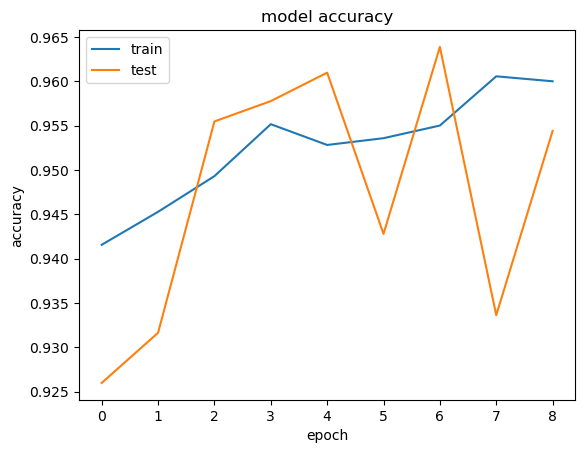

In [62]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

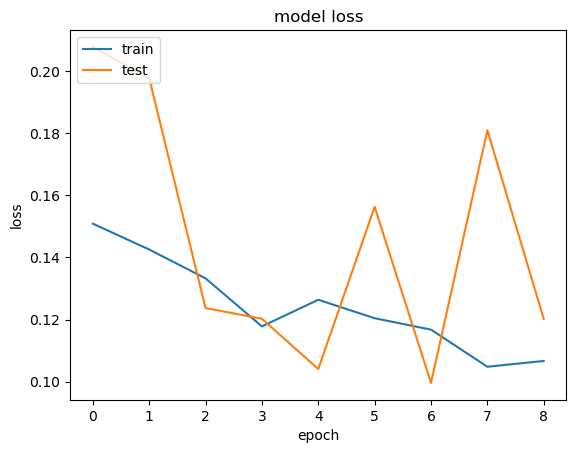

In [63]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()